In [ ]:
# !pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [18]:
import prince
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import 

### Import the HR data set 

In [4]:
data_url = 'https://drive.google.com/file/d/1DdwoOD_JfheYWG4xVFvYjEiqj2usZ52P/export?format=csv'
hr_df = pd.read_csv('data/hr_dataset.csv')

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [11]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    object 
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

In [35]:
hr_df.head()

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [12]:
hr_df['Performance Score']

0                   Fully Meets
1                   Fully Meets
2                   Fully Meets
3      N/A- too early to review
4      N/A- too early to review
                 ...           
305                 Fully Meets
306                 Fully Meets
307                 Fully Meets
308                 Fully Meets
309                 Fully Meets
Name: Performance Score, Length: 310, dtype: object

In [10]:
hr_df['Zip'] = hr_df['Zip'].astype('str')

### Pull out the categorical variables and note the dimensions of the data set.

In [20]:
hr_cat = hr_df.select_dtypes('O')

### Reduce these categorical features down to two dimensions using MCA.

In [31]:
mca_df = hr_cat

mca_df = mca_df.drop(columns=['Zip'])

In [38]:
mca = prince.MCA(2)
mca.fit(mca_df)

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

### Plot the coordinates of each resulting dimension.

ZeroDivisionError: float division by zero

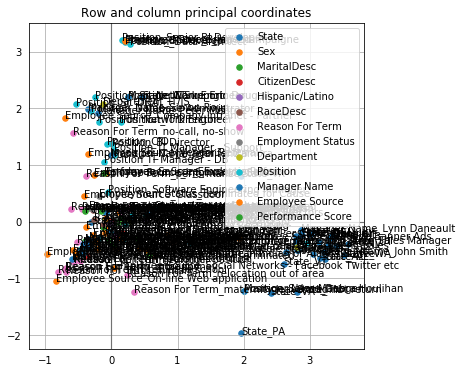

In [41]:
mca.plot_coordinates(mca_df, show_column_labels=True, show_row_points=False)
plt.legend().remove()
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [45]:
hr_dummies = pd.get_dummies(mca_df)
hr_dummies.shape

(310, 155)

### Reduce the one hot encoded categorical features down to two dimensions using MCA.

In [46]:
mca = prince.MCA(2)
mca.fit(hr_dummies)

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

### Plot the coordinates of each resulting dimension.

ZeroDivisionError: float division by zero

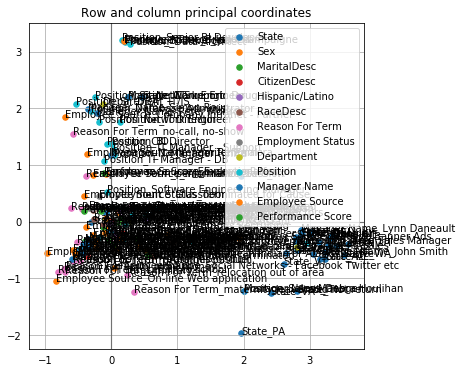

In [47]:
mca.plot_coordinates(hr_dummies, show_column_labels=True, show_row_points=False)
plt.legend().remove()
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [64]:
hr_df.dropna(inplace=True)
hr_df['Department'].value_counts()

Production              208
IT/IS                    50
Sales                    31
Admin Offices            10
Software Engineering     10
Executive Office          1
Name: Department, dtype: int64

In [65]:
department_df = hr_df[hr_df['Department'] != 'Executive Office']

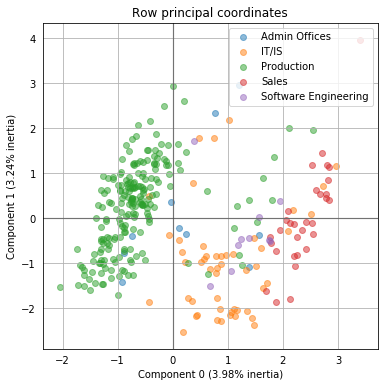

In [71]:
famd = prince.FAMD()

famd.fit(department_df)

famd.plot_row_coordinates(department_df, color_labels=department_df["Department"], ellipse_fill=False, alpha=0.5 )
plt.show()

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

In [53]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    object 
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non